In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import os
import seaborn as sns
import plotly.offline as py
import plotly.io as pio
from scipy import stats
import seaborn as sns

In [2]:
df=pd.read_pickle(r'D:\GANIT\MOCK PROJECT\ADS_source.pkl')

In [3]:
del df["ERROR_DESC"]
del df["unit_idx"]

In [4]:
df.rename(columns = {'die1_ DspPressure':'DspPressure','die1_ Area':'die1_Area','die1_ X':'die1_X','die1_ Y':'die1_Y'}, inplace = True)
df

,datetime,DspPressure,rows,cols,die1_Area,die1_X,die1_Y,BATCHID,amt,STRIPID
0,2021-01-11 10:28:54,82.0,5.0,1.0,3.444,83.36,-298.77,9006721070-401,-23.064516,random13557.0
1,2021-01-11 10:28:54,83.0,3.0,1.0,2.805,-135.06,38.62,9006721070-401,-23.064516,random13557.0
2,2021-01-11 10:28:54,82.0,5.0,2.0,2.908,0.84,349.31,9006721070-401,-23.064516,random13557.0
3,2021-01-11 10:28:54,82.0,4.0,2.0,3.004,-130.21,291.06,9006721070-401,-23.064516,random13557.0
4,2021-01-11 10:28:54,83.0,3.0,2.0,2.793,88.21,-293.91,9006721070-401,-23.064516,random13557.0
...,...,...,...,...,...,...,...,...,...,...
2466253,2021-02-01 03:33:51,102.0,1.0,8.0,2.887,-4.85,-116.19,9006963474-88A,3.961644,random41318.0
2466254,2021-02-01 03:33:53,102.0,5.0,10.0,2.911,179.50,-82.22,9006963474-88A,3.961644,random41318.0
2466255,2021-02-01 03:33:53,102.0,4.0,10.0,2.947,-2.43,-130.75,9006963474-88A,3.961644,random41318.0
2466256,2021-02-01 03:33:53,102.0,4.0,9.0,3.032,261.97,-176.85,9006963474-88A,3.961644,random41318.0


In [5]:
df.drop(df.loc[df['amt']<0].index, inplace=True)
df.drop(df.loc[df['DspPressure']==0].index, inplace=True)
df.dropna(inplace=True)

In [6]:
df

,datetime,DspPressure,rows,cols,die1_Area,die1_X,die1_Y,BATCHID,amt,STRIPID
12655,2021-01-11 12:42:45,86.0,2.0,3.0,2.889,153.74,128.43,9006721174-450,6.066884,LPA013700881
12656,2021-01-11 12:42:45,86.0,1.0,3.0,2.938,173.16,126.00,9006721174-450,6.066884,LPA013700881
12657,2021-01-11 12:42:45,86.0,5.0,3.0,3.010,127.05,-184.69,9006721174-450,6.066884,LPA013700881
12658,2021-01-11 12:42:45,86.0,4.0,3.0,2.932,129.47,60.47,9006721174-450,6.066884,LPA013700881
12659,2021-01-11 12:42:45,86.0,2.0,4.0,2.986,-64.68,-141.00,9006721174-450,6.066884,LPA013700881
...,...,...,...,...,...,...,...,...,...,...
2466253,2021-02-01 03:33:51,102.0,1.0,8.0,2.887,-4.85,-116.19,9006963474-88A,3.961644,random41318.0
2466254,2021-02-01 03:33:53,102.0,5.0,10.0,2.911,179.50,-82.22,9006963474-88A,3.961644,random41318.0
2466255,2021-02-01 03:33:53,102.0,4.0,10.0,2.947,-2.43,-130.75,9006963474-88A,3.961644,random41318.0
2466256,2021-02-01 03:33:53,102.0,4.0,9.0,3.032,261.97,-176.85,9006963474-88A,3.961644,random41318.0


In [7]:
df['Chip_Quality'] = df['die1_Area'].apply(lambda x: 'GOOD' if (x>=2.7 and x<=3.2) else 'BAD')

In [8]:
df

,datetime,DspPressure,rows,cols,die1_Area,die1_X,die1_Y,BATCHID,amt,STRIPID,Chip_Quality
12655,2021-01-11 12:42:45,86.0,2.0,3.0,2.889,153.74,128.43,9006721174-450,6.066884,LPA013700881,GOOD
12656,2021-01-11 12:42:45,86.0,1.0,3.0,2.938,173.16,126.00,9006721174-450,6.066884,LPA013700881,GOOD
12657,2021-01-11 12:42:45,86.0,5.0,3.0,3.010,127.05,-184.69,9006721174-450,6.066884,LPA013700881,GOOD
12658,2021-01-11 12:42:45,86.0,4.0,3.0,2.932,129.47,60.47,9006721174-450,6.066884,LPA013700881,GOOD
12659,2021-01-11 12:42:45,86.0,2.0,4.0,2.986,-64.68,-141.00,9006721174-450,6.066884,LPA013700881,GOOD
...,...,...,...,...,...,...,...,...,...,...,...
2466253,2021-02-01 03:33:51,102.0,1.0,8.0,2.887,-4.85,-116.19,9006963474-88A,3.961644,random41318.0,GOOD
2466254,2021-02-01 03:33:53,102.0,5.0,10.0,2.911,179.50,-82.22,9006963474-88A,3.961644,random41318.0,GOOD
2466255,2021-02-01 03:33:53,102.0,4.0,10.0,2.947,-2.43,-130.75,9006963474-88A,3.961644,random41318.0,GOOD
2466256,2021-02-01 03:33:53,102.0,4.0,9.0,3.032,261.97,-176.85,9006963474-88A,3.961644,random41318.0,GOOD


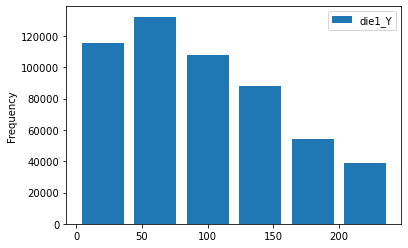

In [9]:
df[['die1_Y']].plot(kind='hist',bins=[0,40,80,120,160,200,240],rwidth=0.8)
plt.show()

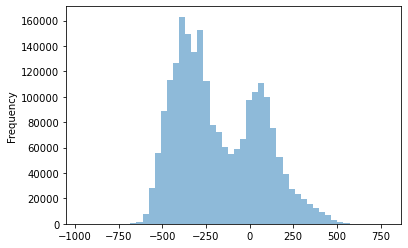

In [10]:
ax=df['die1_Y'].plot.hist(bins=50,alpha=0.5)

<AxesSubplot:>

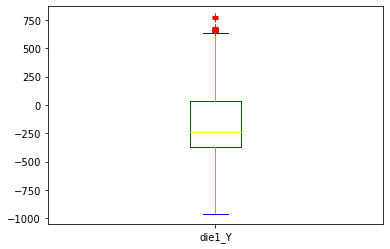

In [11]:
plt.figure();
color = {    "boxes": "DarkGreen",
      "whiskers": "DarkOrange",
        "medians": "Yellow",
        "caps": "Blue",
   }
df['die1_Y'].plot.box(color=color, sym="r+")

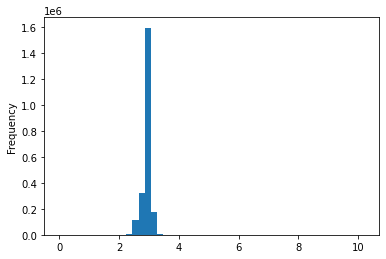

In [12]:
ay = df['die1_Area'].plot.hist(bins=50, alpha=1)

In [13]:
df['die1_Y'].describe().astype(int)

count    2223659
mean        -176
std          240
min         -961
25%         -374
50%         -237
75%           31
max          781
Name: die1_Y, dtype: int32

<AxesSubplot:>

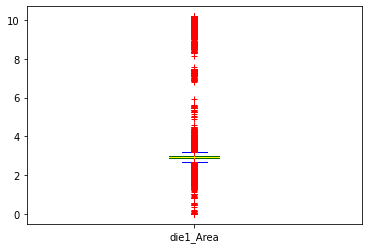

In [14]:
plt.figure();
color = {    "boxes": "DarkGreen",
      "whiskers": "DarkOrange",
        "medians": "Yellow",
        "caps": "Blue",
   }
df['die1_Area'].plot.box(color=color, sym="r+")

In [15]:
print(df['die1_Area'].skew())
df['die1_Area'].describe().astype (int)

17.916021944164182


count    2223659
mean           2
std            0
min            0
25%            2
50%            2
75%            3
max           10
Name: die1_Area, dtype: int32

In [16]:
df1=df.loc[df['BATCHID']=='9006721174-450']
df1

,datetime,DspPressure,rows,cols,die1_Area,die1_X,die1_Y,BATCHID,amt,STRIPID,Chip_Quality
12655,2021-01-11 12:42:45,86.0,2.0,3.0,2.889,153.74,128.43,9006721174-450,6.066884,LPA013700881,GOOD
12656,2021-01-11 12:42:45,86.0,1.0,3.0,2.938,173.16,126.00,9006721174-450,6.066884,LPA013700881,GOOD
12657,2021-01-11 12:42:45,86.0,5.0,3.0,3.010,127.05,-184.69,9006721174-450,6.066884,LPA013700881,GOOD
12658,2021-01-11 12:42:45,86.0,4.0,3.0,2.932,129.47,60.47,9006721174-450,6.066884,LPA013700881,GOOD
12659,2021-01-11 12:42:45,86.0,2.0,4.0,2.986,-64.68,-141.00,9006721174-450,6.066884,LPA013700881,GOOD
...,...,...,...,...,...,...,...,...,...,...,...
26409,2021-01-11 14:24:46,86.0,3.0,5.0,2.944,180.44,94.45,9006721174-450,6.066884,LPA013700166,GOOD
26410,2021-01-11 14:24:46,86.0,4.0,5.0,2.769,141.61,21.63,9006721174-450,6.066884,LPA013700166,GOOD
26411,2021-01-11 14:24:46,86.0,5.0,5.0,2.926,168.30,121.15,9006721174-450,6.066884,LPA013700166,GOOD
26413,2021-01-11 14:24:46,86.0,4.0,6.0,2.859,56.66,186.69,9006721174-450,6.066884,LPA013700166,GOOD


In [17]:
fig1 = px.scatter(df1, x="die1_Y", y="die1_Area",trendline='ols',trendline_color_override='Pink',
          color = 'Chip_Quality',hover_data = ['BATCHID'])
fig1.update_layout(title = 
     'Relation between Area and Y-coordinates with outliers',
      xaxis_title = 'die1_Y' , 
      yaxis_title = 'die1_Area')
%store fig1

Stored 'fig1' (Figure)


In [18]:
df=df[(np.abs(stats.zscore(df['DspPressure'])) < 3)]
df

,datetime,DspPressure,rows,cols,die1_Area,die1_X,die1_Y,BATCHID,amt,STRIPID,Chip_Quality
12655,2021-01-11 12:42:45,86.0,2.0,3.0,2.889,153.74,128.43,9006721174-450,6.066884,LPA013700881,GOOD
12656,2021-01-11 12:42:45,86.0,1.0,3.0,2.938,173.16,126.00,9006721174-450,6.066884,LPA013700881,GOOD
12657,2021-01-11 12:42:45,86.0,5.0,3.0,3.010,127.05,-184.69,9006721174-450,6.066884,LPA013700881,GOOD
12658,2021-01-11 12:42:45,86.0,4.0,3.0,2.932,129.47,60.47,9006721174-450,6.066884,LPA013700881,GOOD
12659,2021-01-11 12:42:45,86.0,2.0,4.0,2.986,-64.68,-141.00,9006721174-450,6.066884,LPA013700881,GOOD
...,...,...,...,...,...,...,...,...,...,...,...
2466253,2021-02-01 03:33:51,102.0,1.0,8.0,2.887,-4.85,-116.19,9006963474-88A,3.961644,random41318.0,GOOD
2466254,2021-02-01 03:33:53,102.0,5.0,10.0,2.911,179.50,-82.22,9006963474-88A,3.961644,random41318.0,GOOD
2466255,2021-02-01 03:33:53,102.0,4.0,10.0,2.947,-2.43,-130.75,9006963474-88A,3.961644,random41318.0,GOOD
2466256,2021-02-01 03:33:53,102.0,4.0,9.0,3.032,261.97,-176.85,9006963474-88A,3.961644,random41318.0,GOOD


In [19]:
df=df[(np.abs(stats.zscore(df['die1_Area'])) < 3)]
df

,datetime,DspPressure,rows,cols,die1_Area,die1_X,die1_Y,BATCHID,amt,STRIPID,Chip_Quality
12655,2021-01-11 12:42:45,86.0,2.0,3.0,2.889,153.74,128.43,9006721174-450,6.066884,LPA013700881,GOOD
12656,2021-01-11 12:42:45,86.0,1.0,3.0,2.938,173.16,126.00,9006721174-450,6.066884,LPA013700881,GOOD
12657,2021-01-11 12:42:45,86.0,5.0,3.0,3.010,127.05,-184.69,9006721174-450,6.066884,LPA013700881,GOOD
12658,2021-01-11 12:42:45,86.0,4.0,3.0,2.932,129.47,60.47,9006721174-450,6.066884,LPA013700881,GOOD
12659,2021-01-11 12:42:45,86.0,2.0,4.0,2.986,-64.68,-141.00,9006721174-450,6.066884,LPA013700881,GOOD
...,...,...,...,...,...,...,...,...,...,...,...
2466253,2021-02-01 03:33:51,102.0,1.0,8.0,2.887,-4.85,-116.19,9006963474-88A,3.961644,random41318.0,GOOD
2466254,2021-02-01 03:33:53,102.0,5.0,10.0,2.911,179.50,-82.22,9006963474-88A,3.961644,random41318.0,GOOD
2466255,2021-02-01 03:33:53,102.0,4.0,10.0,2.947,-2.43,-130.75,9006963474-88A,3.961644,random41318.0,GOOD
2466256,2021-02-01 03:33:53,102.0,4.0,9.0,3.032,261.97,-176.85,9006963474-88A,3.961644,random41318.0,GOOD


In [20]:
df=df[(np.abs(stats.zscore(df['amt'])) < 3)]
df

,datetime,DspPressure,rows,cols,die1_Area,die1_X,die1_Y,BATCHID,amt,STRIPID,Chip_Quality
12655,2021-01-11 12:42:45,86.0,2.0,3.0,2.889,153.74,128.43,9006721174-450,6.066884,LPA013700881,GOOD
12656,2021-01-11 12:42:45,86.0,1.0,3.0,2.938,173.16,126.00,9006721174-450,6.066884,LPA013700881,GOOD
12657,2021-01-11 12:42:45,86.0,5.0,3.0,3.010,127.05,-184.69,9006721174-450,6.066884,LPA013700881,GOOD
12658,2021-01-11 12:42:45,86.0,4.0,3.0,2.932,129.47,60.47,9006721174-450,6.066884,LPA013700881,GOOD
12659,2021-01-11 12:42:45,86.0,2.0,4.0,2.986,-64.68,-141.00,9006721174-450,6.066884,LPA013700881,GOOD
...,...,...,...,...,...,...,...,...,...,...,...
2466253,2021-02-01 03:33:51,102.0,1.0,8.0,2.887,-4.85,-116.19,9006963474-88A,3.961644,random41318.0,GOOD
2466254,2021-02-01 03:33:53,102.0,5.0,10.0,2.911,179.50,-82.22,9006963474-88A,3.961644,random41318.0,GOOD
2466255,2021-02-01 03:33:53,102.0,4.0,10.0,2.947,-2.43,-130.75,9006963474-88A,3.961644,random41318.0,GOOD
2466256,2021-02-01 03:33:53,102.0,4.0,9.0,3.032,261.97,-176.85,9006963474-88A,3.961644,random41318.0,GOOD


In [21]:
df2=df.loc[df['BATCHID']=='9006721174-450']
df2

,datetime,DspPressure,rows,cols,die1_Area,die1_X,die1_Y,BATCHID,amt,STRIPID,Chip_Quality
12655,2021-01-11 12:42:45,86.0,2.0,3.0,2.889,153.74,128.43,9006721174-450,6.066884,LPA013700881,GOOD
12656,2021-01-11 12:42:45,86.0,1.0,3.0,2.938,173.16,126.00,9006721174-450,6.066884,LPA013700881,GOOD
12657,2021-01-11 12:42:45,86.0,5.0,3.0,3.010,127.05,-184.69,9006721174-450,6.066884,LPA013700881,GOOD
12658,2021-01-11 12:42:45,86.0,4.0,3.0,2.932,129.47,60.47,9006721174-450,6.066884,LPA013700881,GOOD
12659,2021-01-11 12:42:45,86.0,2.0,4.0,2.986,-64.68,-141.00,9006721174-450,6.066884,LPA013700881,GOOD
...,...,...,...,...,...,...,...,...,...,...,...
26409,2021-01-11 14:24:46,86.0,3.0,5.0,2.944,180.44,94.45,9006721174-450,6.066884,LPA013700166,GOOD
26410,2021-01-11 14:24:46,86.0,4.0,5.0,2.769,141.61,21.63,9006721174-450,6.066884,LPA013700166,GOOD
26411,2021-01-11 14:24:46,86.0,5.0,5.0,2.926,168.30,121.15,9006721174-450,6.066884,LPA013700166,GOOD
26413,2021-01-11 14:24:46,86.0,4.0,6.0,2.859,56.66,186.69,9006721174-450,6.066884,LPA013700166,GOOD


In [22]:
fig2 = px.scatter(df2, x="die1_Y", y="die1_Area",trendline='ols',trendline_color_override='Pink',
          color = 'Chip_Quality',hover_data = ['BATCHID'])
fig2.update_layout(title = 
     'Relation between Area and Y-coordinates without outliers',
      xaxis_title = 'die1_Y' , 
      yaxis_title = 'die1_Area')
%store fig2

Stored 'fig2' (Figure)


In [23]:
column_1=df['die1_Area']
column_2=df['die1_Y']
correlation = column_1.corr(column_2)
correlation

0.14569376771764653

In [24]:
correlation_df = df.corr()
correlation_df

,DspPressure,rows,cols,die1_Area,die1_X,die1_Y,amt
DspPressure,1.000000,0.000177,0.000018,-0.022019,-0.049678,-0.099256,0.062160
rows,0.000177,1.000000,-0.000130,0.053665,-0.070153,-0.044210,-0.000026
cols,0.000018,-0.000130,1.000000,0.071769,-0.015314,-0.002120,-0.000917
die1_Area,-0.022019,0.053665,0.071769,1.000000,0.207904,0.145694,0.169335
die1_X,-0.049678,-0.070153,-0.015314,0.207904,1.000000,0.176635,0.018211
die1_Y,-0.099256,-0.044210,-0.002120,0.145694,0.176635,1.000000,-0.000332
amt,0.062160,-0.000026,-0.000917,0.169335,0.018211,-0.000332,1.000000


In [25]:
results = px.get_trendline_results(fig2)
results = results.iloc[0]["px_fit_results"].summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.961
Date:                Mon, 12 Apr 2021   Prob (F-statistic):             0.0466
Time:                        11:05:39   Log-Likelihood:                 16144.
No. Observations:               13435   AIC:                        -3.228e+04
Df Residuals:                   13433   BIC:                        -3.227e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9249      0.001   4394.867      0.000       2.924       2.926
x1         -6.217e-06   3.12e-06     -1.990      0.047   -1.23e-05   -9.41e-08
==============================================================================
Omnibus:                      443.046   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              490.211
Skew:                           0.448   Prob(JB):                    3.56e-107
Kurtosis:                       3.273   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
rsq1 = px.get_trendline_results(fig2).px_fit_results.iloc[0].rsquared
rsq1

0.0002947926182006455

<AxesSubplot:>

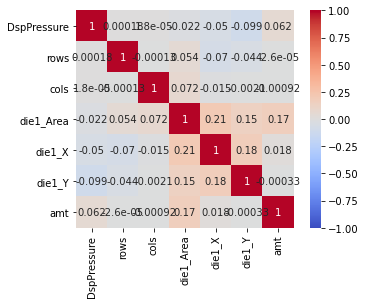

In [27]:
correlation_df = df.corr()
sns.heatmap(correlation_df, annot=True,vmin=-1,vmax=1,center=0,cmap='coolwarm',linecolor='black',square=True)